In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
#Set working directory
os.chdir("C:/Users/HP/.jupyter")

In [3]:
#Load data
data = pd.read_csv("bank-loan.csv")

In [4]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


# EXPLORATERY DATA ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
data.isna().sum().sum()

150

In [7]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(data.isnull().sum())
#Apply KNN imputation algorithm
#marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,default,17.647059
1,age,0.000000
2,ed,0.000000
3,employ,0.000000
4,address,0.000000
5,income,0.000000
6,debtinc,0.000000
7,creddebt,0.000000
8,othdebt,0.000000


In [8]:
data['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [9]:
data = data.iloc[0:700]

In [10]:
data.shape

(700, 9)

In [11]:
data['default'].isnull().sum()

0

In [12]:
data['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

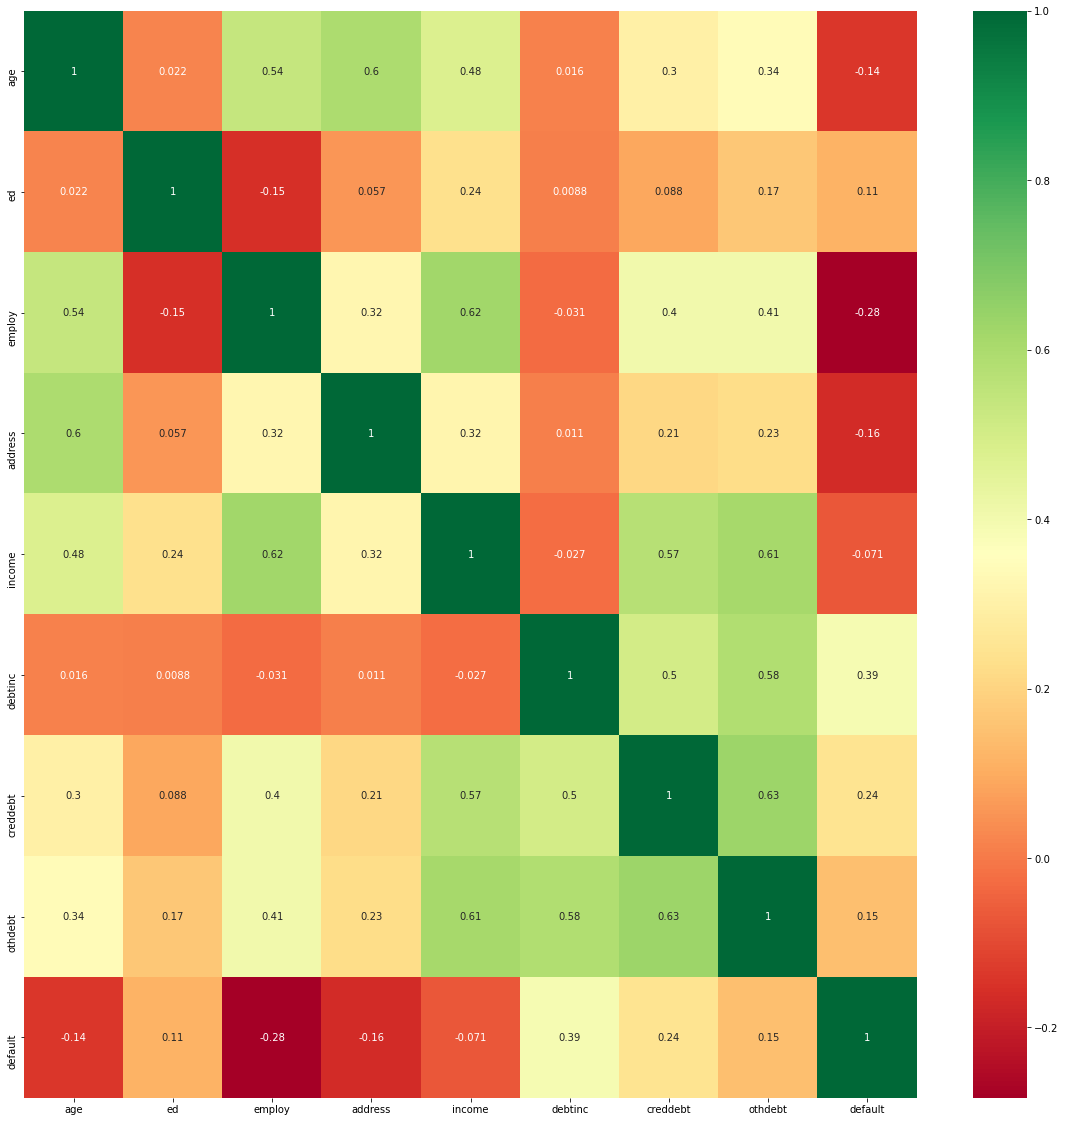

In [15]:
# Correlation b/w variables for Feature Selection.

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
'''There is no any highly corelated variable present in dataset so there is no need of remove any feature.'''

'There is no any highly corelated variable present in dataset so there is no need of remove any feature.'

# FEATURE SCALING

In [16]:
## feature scaling is done using normalization.
cnames = ["age","ed","employ","address","income","debtinc","creddebt",
           "othdebt"]
#Nomalisation
for i in cnames:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

age
ed
employ
address
income
debtinc
creddebt
othdebt


In [17]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.583333,0.50,0.548387,0.352941,0.375000,0.217604,0.552210,0.183897,1.0
1,0.194444,0.00,0.322581,0.176471,0.039352,0.413203,0.065719,0.146554,0.0
2,0.555556,0.00,0.483871,0.411765,0.094907,0.124694,0.041090,0.078677,0.0
3,0.583333,0.00,0.483871,0.411765,0.245370,0.061125,0.128811,0.028742,0.0
4,0.111111,0.25,0.064516,0.000000,0.032407,0.413203,0.086412,0.111567,1.0



# MODEL DEVELOPMENT

In [18]:
#Divide data into train and test
X = data.values[:, 0:8]
Y = data.values[:,8]
Y=Y.astype('int')

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [19]:
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(560, 8) (560,)
(140, 8) (140,)


#### LOGISTIC REGRESSION

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

#### RANDOM FOREST CLASSIFIER

In [21]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

#### KNN CLASSIFIER

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [23]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
87.50,KNN
78.93,Logistic Regression


Here Random forest provides 100% of Acurracy then KNN 88.38% and Logistic Regression 80.74%.
Here Random Forest Gives 100% of Accuracy but now we need to do Cross Validation 

### RANDOM FOREST CROSS VALIDATION

In [24]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78571429 0.69642857 0.82142857 0.78571429 0.67857143 0.85714286
 0.83928571 0.69642857 0.83928571 0.83928571]
Mean: 0.7839285714285714
Standard Deviation: 0.06509902190556495


Here Average Accuracy that Random Forest Gives is 82% with Std.deviation of 3%. So Random Forest has Actually 82% accuracy with 3% up/down.

#### Confusion Metrix

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[367,  38],
       [ 83,  72]], dtype=int64)

#### Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6545454545454545
Recall: 0.4645161290322581


#### F1 score

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.5433962264150943

#### ROC CURVE

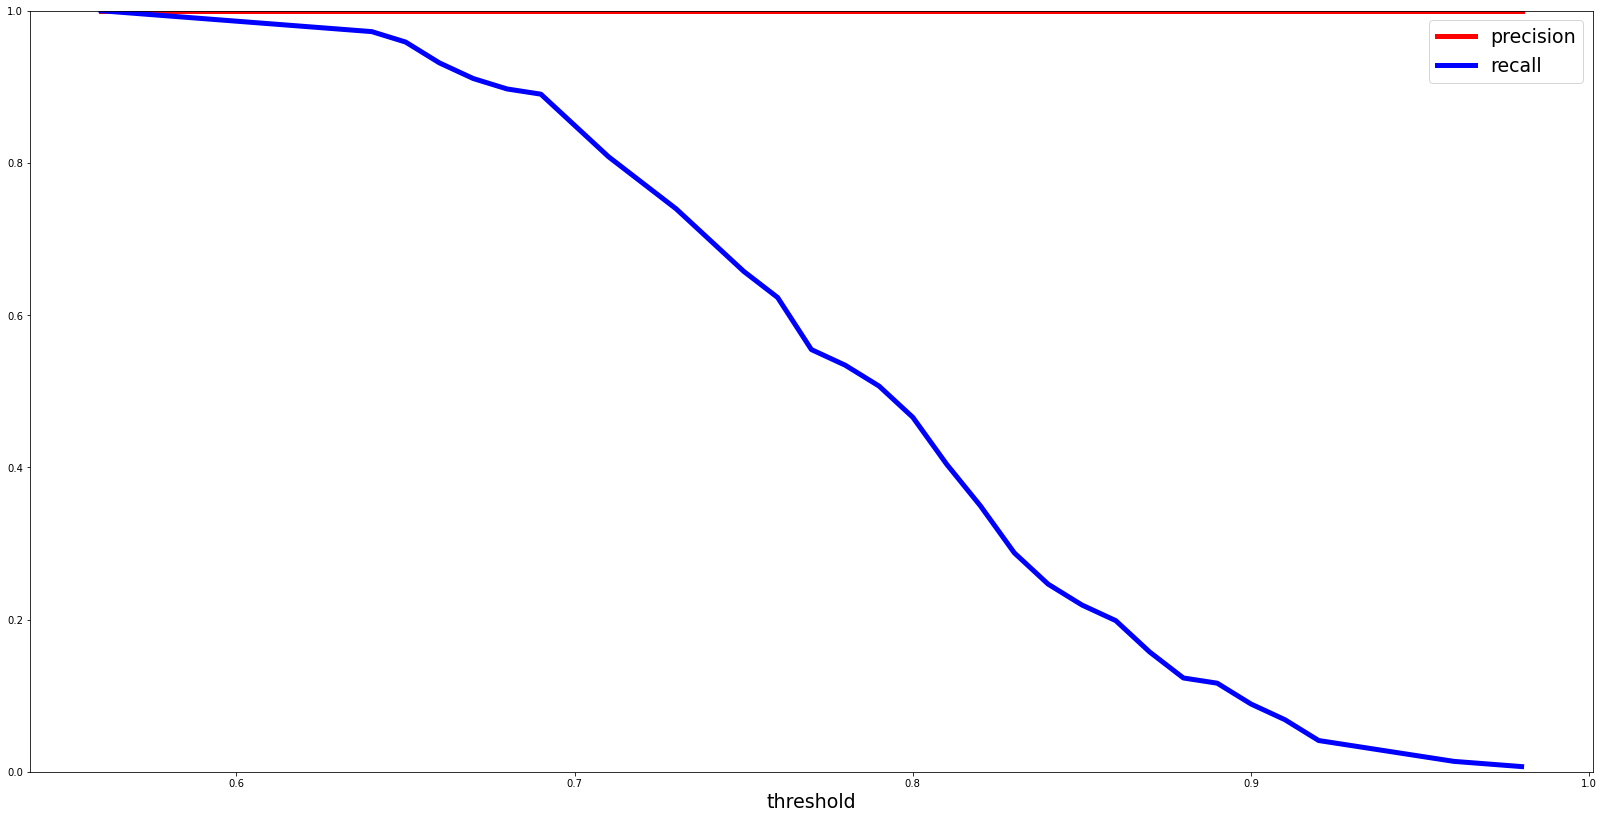

In [25]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(28, 14))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Finally Random Forest gives 82% Accuracy which is still good and acceptable model.